<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center>**Bachelor of Ecole Polytechnique**</center>
<center>Computational Mathematics, year 2, semester 1</center>
<center>Lecturer: Lucas Gerin <a href="mailto:lucas.gerin@polytechnique.edu">(send mail)</a></center>

# Final Project: Stern-Brocot tree and the $3n+1$ problem


<div markdown=1 class=Abstract>

<b>Content:</b>
* 40% Experimental Mathematics
* 30% Recursive programming
* 20% Number Theory
* 10% Matrices

This project is about the Stern-Brocot tree: a nice and profound mathematical object which allows to investigate the approximation of reals by rational numbers. 

   - The first part is about an experimental approach to this topic.
   - In a second part we propose an application to an old conjecture in Number Theory: the $3n+1$ problem.

## Table of contents

- [The Stern-Brocot tree](#SternBrocot)
   - [Paths in the Stern-Brocot tree](#Paths)
   - [Approximations of reals with rationals](#Approx)
- [Application: The $3n+1$ problem](#3nPlus1)
   - [Farey intervals and size of cycles](#Farey)


In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/customProject.css").read()
    return HTML(styles)
css_styling()

In [2]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)
import sympy as sympy           # package for symbolic computation


Here are two cells that you can copy/paste throughout the Notebook:

<div markdown=1 class="Answers"> 
<i>Your maths answers.</i>

<div markdown=1 class="Prop"> 
<i>In this cell you can add your own additional questions (math or python).</i>

<a id='SternBrocot'></a>
# The Stern-Brocot tree

### Preliminaries

The Stern-Brocot construction allows to build all the rational numbers $m/n \in [0,+\infty]$ such that $m,n$ are coprime. The idea is to start with the sequence $S_0=(\tfrac{0}{1},\tfrac{1}{0})$ (we consider $1/0$ as the rational notation for $+\infty$) and then to repeat the following procedure:
<center>
    To define $S_{t+1}$ insert $\frac{m+m'}{n+n'}$ between each consecutive $\frac{m}{n}$ and $\frac{m'}{n'}$ in $S_t$.
</center>
The fraction $\frac{m+m'}{n+n'}$ is called the <i>mediant</i> of  $\frac{m}{n}$ and $\frac{m'}{n'}$.
After one step we obtain:
$$
S_1=(\tfrac{0}{1},\tfrac{1}{1},\tfrac{1}{0})
$$
then
$$
S_2=(\tfrac{0}{1},\tfrac{1}{2},\tfrac{1}{1},\tfrac{2}{1},\tfrac{1}{0})
$$
and
$$
S_3=(\tfrac{0}{1},\tfrac{1}{3},\tfrac{1}{2},\tfrac{2}{3},\tfrac{1}{1},\tfrac{3}{2},\tfrac{2}{1},\tfrac{3}{1},\tfrac{1}{0}),
$$
and so on. 
As we will see every nonnegative rational can be obtained with the Stern-Brocot construction:
$$
\bigcup_t S_t = \mathbb{Q}_{\geq 0} \cup \{1/0\}.
$$

<div markdown=1 class="DoIt"> 

Write a function which returns the set $S_t$. You can represent the rational $p/q$ as the pair  `[p,q]`  and sets $S_t$ as a list of pairs:

```
Stern-Brocot set S_3: 
[[0, 1], [1, 3], [1, 2], [2, 3], [1, 1], [3, 2], [2, 1], [3, 1], [1, 0]]
```

In [3]:
def S_t(t):
    S = {
        0: [[0, 1], [1, 0]] # S_0
    }
    for i in range(1, t+1):
        S[i] = []
        for j in range(len(S[i-1])-1):
#             print(S[i-1])
            S[i] += [S[i-1][j]]
            numerator = S[i-1][j][0]+S[i-1][j+1][0]
            denominator = S[i-1][j][1]+S[i-1][j+1][1]
            S[i] += [[numerator, denominator]]
#         print(S[i-1])
        S[i] += [S[i-1][-1]]
#         print(S)
    return S[t]

print(S_t(3))

[[0, 1], [1, 3], [1, 2], [2, 3], [1, 1], [3, 2], [2, 1], [3, 1], [1, 0]]


This is also convenient to draw the sets $S_t$ in an infinite binary tree $\mathcal{T}$ :
<img src='figures/SternTree.jpg' width=70%>
We can recover each $S_t$ from $\mathcal{T}$ if we take all the elements of the tree at levels $1,2,\dots,t$ and read them from left to right. (Then we add $0/1$ and $1/0$ at the beginning and at the end of the sequence.)

<div markdown=1 class="Rmk"> The Stern-Broccot tree has the following properties (which we admit):

* All the fractions in $\mathcal{T}$ are irreducible.
* Every positive fraction appears exactly once in $\mathcal{T}$.


<a id='Paths'></a>
## Paths in the Stern-Brocot tree
In order to move inside the tree we will define two operators $\texttt{L}/\texttt{R}$ (Left/Right). Each string $\texttt{S}$ of letters $\texttt{L}/\texttt{R}$ will define a node in $\mathcal{T}$ as follows:
* The empty string $\emptyset$ corresponds to $1/1$ (which is the root of the tree) ;
* $\texttt{SL}$ is the left child of the node corresponding to $\texttt{S}$ ;
* $\texttt{SR}$ is the right child of the node corresponding to $\texttt{S}$.

For example we can move to $3/4$ through the path $\emptyset = 1/1 \stackrel{\text{Left}}{\to} 1/2 \stackrel{\text{Right}}{\to} 2/3 \stackrel{\text{Right}}{\to} 3/4$.

Therefore we identify the rational number $3/4$ and the corresponding string $\texttt{LRR}$.

### Representation with matrix products

To each string $\texttt{S}$ (or equivalently to the rational $m/n$ corresponding to $\texttt{S}$ ) we associate the $2\times 2$ matrix 
$$
\mathcal{M}(\texttt{S}):=
\begin{pmatrix}
b & b' \\
a & a'\\
\end{pmatrix}
$$
where $a/b$ and $a'/b'$ are the closest fractions preceding and following  $m/n$ among all the nodes from the upper levels of the tree. By construction of the sets $(S_t)$, $m/n$ was obtained as the mediant of $a/b$ and $a'/b'$:
$$
\frac{m}{n}=\frac{a+a'}{b+b'}.
$$

For example, consider $m/n=3/5$ which is at level $4$ (or equivalently the string $\texttt{LRL}$). Then the closest fractions above $3/5$ among levels $0,1,2,3$ are $1/2$ and $2/3$. Therefore
$$
\mathcal{M}(3/5)=
\begin{pmatrix}
2 & 3 \\
1 & 2\\
\end{pmatrix}.
$$


A look at the above picture shows for example:
$$
\mathcal{M}(\emptyset )=
\begin{pmatrix}
1 & 0 \\
0 & 1\\
\end{pmatrix}
,
\qquad
\mathcal{M}(LRR)=
\begin{pmatrix}
3 & 1 \\
2 & 1\\
\end{pmatrix}
$$

<div markdown=1 class="DoIt"> 

1. <b>(Theory)</b> Find a $2\times 2$ matrix $\mathcal{L}$ (resp.  $\mathcal{R}$) such that going left (resp.  right) in the tree amounts to multiplying by $\mathcal{L}$ (resp.  $\mathcal{R}$):
$$
\mathcal{M}(\texttt{SL})=\mathcal{M}(\texttt{S})\mathcal{L}, \qquad \mathcal{M}(\texttt{SR})=\mathcal{M}(\texttt{S})\mathcal{R}.
$$
2. Deduce a function python which computes $\mathcal{M}(\texttt{S})$ for every string, and the corresponding fraction.

<div markdown=1 class="Answers"> 
1.
Let us take $\mathcal{M}(S) = \begin{pmatrix} b & b'' \\ a & a'' \end{pmatrix}$ where $a'=a+a''$ and $b'=b+b''$.
We also take $\mathcal{M}(SL) = \begin{pmatrix}b & b' \\ a & a'\end{pmatrix}$.

We calculate the inverse of $\mathcal{M}(s)$ and using the equation $\mathcal{M}(S)^{-1}\mathcal{M}(SL) = \mathcal{L}$ we get
$$\mathcal{L} = \begin{pmatrix}1 & 1 \\ 0 & 1\end{pmatrix}$$

We use the same process with $\mathcal{M}(SR)=\begin{pmatrix}b' & b'' \\ a' & a''\end{pmatrix}$ to find $$\mathcal{R}=\begin{pmatrix} 1 & 0 \\ 1 & 1\end{pmatrix}$$

In [4]:
L = np.matrix("1 1; 0 1")
R = np.matrix("1 0; 1 1")
def M_S(s):
    mat = np.matrix("1 0; 0 1")
    for letter in s:
        if letter == 'L':
            mat = np.matmul(mat, L)
        elif letter == 'R':
            mat = np.matmul(mat, R)
    return mat
            
print(M_S("LRR"))

[[3 1]
 [2 1]]


<div markdown=1 class="DoIt"> With experiments or theory, find the real numbers associated to the following patterns:

* $\texttt{LRLRLRLRLR}...$
* $\texttt{LLRRLLRR}...$


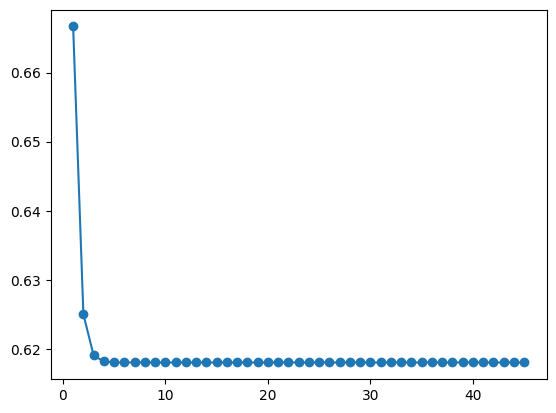

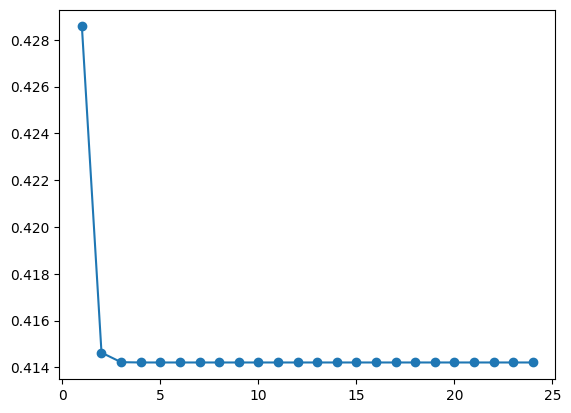

In [41]:
LR_sequence = []
N = 46
for i in range(N):
    temp = M_S("LR"*i)
    LR_sequence.append((temp[1, 0]+temp[1,1])/(temp[0, 0]+temp[0, 1]))

n = np.arange(1, N)
# plt.yxcale('log')
plt.plot(n, LR_sequence[1:], marker='o') # remove the first element so the graph is more clear
plt.show()
# LR_sequence

LLRR_seq = []
N = 25
for i in range(N):
    temp = M_S("LLRR"*i)
    LLRR_seq.append((temp[1, 0]+temp[1,1])/(temp[0, 0]+temp[0, 1]))

n = np.arange(1, N)
plt.plot(n, LLRR_seq[1:], marker='o')
plt.show()
# LLRR_seq

<div markdown=1 class="Answers"> 
From the igures and the calculations we can observe that $LRLRLR...$ tends to $0.6$ and $LLRRLLRR...$ tends to $0.4$.

<div markdown=1 class="Prop">
Can you find a recursive formula for the matrix of the sequence?

<div markdown=1 class="Answers">
The first sequence can be written as $I_n LRLR...$. From the fact that $I_n$ is the neutral element for matrix multiplication and the associativity of matrices, we can rewrite it as $$(LR)(LR)(LR)...=(LR)^n$$

$$LR=\begin{pmatrix}2 & 1 \\ 1 & 1\end{pmatrix}$$

So the sequence is $(LR)^n=\begin{pmatrix}2 & 1 \\ 1 & 1\end{pmatrix}^n$
Let us show by induction the formula $(LR)^n=
\begin{pmatrix}
\text{sum of all elements of } (LR)^{n-1} & \text{sum of the top row of } (LR)^{n-1} \\ 
\text{sum of the top row of } (LR)^{n-1} & \text{the first element of } (LR)^{n-1}\end{pmatrix}$. We checked by calculations that the case with $n=1$ is true.

Let us now assume that the equation stands for some $n\in \mathbb{N}$. Using this equation let us prove that it holds for $n+1$.

Take $(LR)^n=\begin{pmatrix} a & b \\ b & c\end{pmatrix}$, where we can observe from the computed results that $b+d=a$

We have $(LR)^{n+1}=\begin{pmatrix} a & b \\ b & c\end{pmatrix}\begin{pmatrix}2 & 1 \\ 1 & 1\end{pmatrix}=\begin{pmatrix} 2a+b & a+b \\ 2b+d & b+d\end{pmatrix}=\begin{pmatrix} a+b+b+d & a+b \\ a+b & b+d\end{pmatrix}$

Which proves our assumption.

### String associated to a rational number


Here is an algorithm which returns the string associated to a fraction $x$ (below we identify a string $\texttt{S}$ and the corresponding fraction): 

<b>Algorithm</b><br>
<b>inputs:</b> $x$: positive rational number. .<br>
<b>Output:</b> String $\texttt{S}$ associated to $x$.<br>

$\texttt{S}\leftarrow \emptyset$.

<b>while</b> $\texttt{S}\neq x$:
   - <b>if</b> $\texttt{S}>x$:
      * we go left: $\texttt{S}\leftarrow \texttt{SL}$
   - <b>else</b>:
      * we go right: $\texttt{S}\leftarrow \texttt{SR}$
   
Return $\texttt{S}$.

<div markdown=1 class="DoIt"> Write a function python which returns the string associated to any positive rational number.


<div markdown=1 class="Answers"> 

In [7]:
S = ""
def assoc_str(x, S=""):
    temp = M_S(S)
    val = (temp[1, 0]+temp[1,1])/(temp[0, 0]+temp[0, 1])
    if val == x:
        return S
    elif val > x:
        return assoc_str(x, S+'L')
    else:
        return assoc_str(x, S+'R')

assoc_str(3/4)
assoc_str(1/5)
assoc_str(2/5)
assoc_str(3/8)

'LLRL'

<a id='Approx'></a>

## Approximations of irrationals: infinite paths
Irrational numbers ($\pi,e,\sqrt{2}$,...) do not appear in the Stern-Broccot tree but correspond in fact to infinite paths in the tree. This path allows to find good rational approximations of irrational numbers.

Here is a formal construction:

<b>Algorithm</b><br>
<b>inputs:</b> $x$: positive irrational number. $N$: non-negative integer.<br>
<b>Output:</b> String $\texttt{S}$ of length $N$. $\texttt{S}$ is the rational of level $N$ which is the closest to $x$.<br>

$n\leftarrow 0$<br>
$\texttt{S}\leftarrow \emptyset$.

<b>while</b> $n < N$:
   - <b>if</b> $\texttt{S}>x$:
      * we go left: $\texttt{S}\leftarrow \texttt{SL}$
   - <b>else</b>:
      * we go right: $\texttt{S}\leftarrow \texttt{SR}$
   - $n\leftarrow n+1$
   
Return $\texttt{S}$.

<div markdown=1 class="DoIt">  

1. Compute the beginning of the expansion in $\texttt{L}$'s and $\texttt{R}$'s of $\pi$ and $e$. 
2. Can you find the pattern in the expansion of $\sqrt{2}$? of $e$ (less easy to see)?
3. Use your code to obtain good rational approximations of $\pi$. You should find something like:

<table>
            <tr>
                <td width="100"> Level</td>
                <td > m/n</td>
                <td> numerical value</td>
            </tr>
            <tr>
                <td width="100"> 1</td>
                <td > 1/1</td>
                <td> 1.0</td>
            </tr>
            <tr>
                <td width="100"> 2</td>
                <td > 2/1</td>
                <td> 2.0</td>
            </tr>
            <tr>
                <td width="100"> 3</td>
                <td > 3/1</td>
                <td> 3.0</td>
            </tr>
            <tr>
                <td width="100"> ...</td>
                <td > ... </td>
                <td> ... </td>
            </tr>
            <tr>
                <td width="100"> 14</td> 
                <td > 91 / 29</td>
                <td> 3.13793103...</td>
            </tr>

</table>

In [16]:
S = ""
def assoc_str(x, N):
    S = ""
    n = 1
    while n < N:
        temp = M_S(S)
        val = (temp[1, 0]+temp[1,1])/(temp[0, 0]+temp[0, 1])
        if val > x:
            S += 'L'
        else:
            S += 'R'
        n += 1
    return S

print('----------1----------')
print('The expansion in the first 20 characters of pi: ', assoc_str(pi, 20))
print('The expansion in the first 20 characters of e: ', assoc_str(e, 20))

print('----------2----------')
print('The first 20 characters of the expansion of sqrt(2):', assoc_str(sqrt(2), 20))
print('The expansion in the first 100 characters of e: ', assoc_str(e, 100))

print('----------2----------')
for i in range(1, 15):
    temp = M_S(assoc_str(pi, i))
    print('Level', i, ' value ', (temp[1, 0]+temp[1,1])/(temp[0, 0]+temp[0, 1]))

----------1----------
The expansion in the first 20 characters of pi:  RRRLLLLLLLRRRRRRRRR
The expansion in the first 20 characters of e:  RRLRRLRLLLLRLRRRRRR
----------2----------
The first 20 characters of the expansion of sqrt(2): RLLRRLLRRLLRRLLRRLL
The expansion in the first 100 characters of e:  RRLRRLRLLLLRLRRRRRRLRLLLLLLLLRLRRRRRRRRRRLRLLLLLLLLLLLLRLRRRRRRRRRRRRRRRRLRRLLLLLLLLLRLLLLLLLLRLLLR
----------2----------
Level 1  value  1.0
Level 2  value  2.0
Level 3  value  3.0
Level 4  value  4.0
Level 5  value  3.5
Level 6  value  3.3333333333333335
Level 7  value  3.25
Level 8  value  3.2
Level 9  value  3.1666666666666665
Level 10  value  3.142857142857143
Level 11  value  3.125
Level 12  value  3.1333333333333333
Level 13  value  3.1363636363636362
Level 14  value  3.1379310344827585


<div markdown=1 class="Answers"> 
    
1. $\pi\equiv$ RRRLLLLLLLRRRRRRRRRR...
    
$e\equiv$ RRLRRLRLLLLRLRRRRRRL...

2. The pattern of $\sqrt{2}$ is two of each character, alternating, starting with one $\texttt{R}$ and continuing with $\texttt{L}$ and so on.

## Efficiency of coding reals with $\texttt{L,R}$'s

With $n$ binary symbols $0/1$ one can approximate a real number $x\in (0,1)$ in base $2$ with a precision $2^{-n}$. For example for $n=6$:
$$
\pi -3 \approx .001001_{2}
$$


<div markdown=1 class="DoIt">  For larger and larger values of $n$, compare the precision of the approximations of a given $x$ with $n$ symbols in the binary expansion of $x$ and that given with $n$ symbols in the $\texttt{L,R}$ expansion.


<a id='3nPlus1'></a>
# Application: The $3n+1$ problem

The $3n+1$ problem is a famous unsolved problem in Number Theory. Interestingly the Stern-Broccot construction provides an important progress towards the resolution of the conjecture.

### Statement of the problem
Let $C: \mathbb{N}\to \mathbb{N}$ be the function defined by
$$
C(x)=
\begin{cases}
x/2 &\text{ if $x$ is odd},\\
3x+1 &\text{ if $x$ is even}
\end{cases}.
$$
For any positive integer $a$ we consider the sequence
$$
u_n:
\begin{cases}
u_0&= a ,\\
u_{n+1}&=C(u_n)\qquad \text{ for every }\geq 0. 
\end{cases}.
$$
For example if $a=7$ one obtains
$$
10 \to 5 \to 16 \to 8 \to 4 \to 2 \to 1 \to 4 \to 2 \to 1 \dots
$$


The conjecture is that, starting from any positive integer $a$, the sequence will eventually reach the cycle $ 4 \to 2 \to 1$.

As $(u_n)$ is defined by recurrence and takes its values in $\mathbb{N}$, four things can happen:
* $(u_n)$ converges to a fixed point of $C$, this is impossible since $C$ has no fixed point (except $0$) ;
* $(u_n)$ reaches the cycle  $4 \to 2 \to 1$ ;
* $(u_n)$ reaches another cycle ;
* $(u_n)$ converges to $+\infty$.

Of course we will not prove the conjecture but we will prove that if $(u_n)$ reaches another cycle then it has to be very large.

<a id="conjecture"></a>
### Preliminaries: Testing the conjecture

<div markdown=1 class="DoIt"> 
Use python to check that the conjecture is true up to (at least) $a=1000000$. Try to be efficient, and explain your strategy.

In [8]:
def collatz(x):
    while x % 2 == 0:
        #sometimes the numbers are a power of two so we just divide until we get an odd number before calling the function again
        x = x // 2
    if x == 4 or x == 1: # if it reached 4 it will reach 2 and 1, and the cycle will repeat
        return True
    if x % 2 != 0:
        # when you have an odd number and you multiply it by 3 and add 1 you get an even number, which will have to be divided by 2
        # thus, we are jumping over a step slightly improving the performance
        return collatz((3*x+1)//2)

for a in range(1, 1000000):
    if not collatz(a):
        print("False")
print("Done!")

Done!


<a id="cycle"></a>
## A constraint for short cycles

Assume that cycles different from $1\to 4\to 2\to 1$ exist. Let
$$
x_1 \to x_2 \to x_3 \dots \to x_N \to x_1
$$
be a cycle of length $N$. We want to prove that necessarily $N$ is huge. 
 
Denote by $a_1,\dots a_p$ the even elements of the cycle and by $b_1,\dots,b_q$ the odd elements, we have $N=p+q$. From the Preliminaries we know that if they exist each $a_i$ and each $b_i$ is larger than $m=1000000$.

S.Eliahou proved the following result:

<b>Theorem (Eliahou (1993))</b>. Let $m$ be such that the $3n+1$ conjecture is true up to $m$. If there exists a cycle with $p$ even elements and $q$ odd elements then
$$
\frac{\log(3)}{\log(2)}< \frac{p}{q} \leq \frac{\log(3+ \tfrac{1}{m})}{\log(2)}. \qquad (\star)
$$

Reference: S.Eliahou. The $3x+ 1$ problem: new lower bounds on nontrivial cycle lengths. <i>Discrete mathematics</i>, 118(1-3), 45-56 (1993).

<div markdown=1 class="DoIt"> 

1. Show that
$$
a_1\times \dots \times a_p\times b_1 \times \dots \times b_q
= C(a_1)\times \dots \times C(a_p)\times C(b_1) \times \dots \times C(b_q)
$$
2. Compute the right-hand side in the above equation. Deduce that
$$
3^q < 2^p \leq (3+ \tfrac{1}{m})^q.
$$
3. Prove the Eliahou Theorem.

<b>You can use the Eliahou Theorem in the sequel even if you didn't prove it.</b>



<div markdown=1 class="Answers"> 


### Lower bound for $N$: brute force.

<div markdown=1 class="DoIt">

1.  Write a script which uses the Preliminaries and Equation $(\star)$ to find a big $q_0$ such that $q\geq q_0$. (You can use brute force.) 
2. Find a big lower bound for $N$.

<div markdown=1 class="Answers"> 



<a id='Farey'></a>
## Lower bound for $N$: Farey intervals

A <i>Farey interval</i> is an interval composed by two consecutive fractions in some set $S_t$. For example, $[3/7;1/2]$ is a Farey interval since $3/7$ and $1/2$ are two consecutive numbers in $S_5$.

Farey intervals have the following property: If $I=[s_1/t_1;s_2/t_2]$ is a Farey interval then every rational in $I$ has a denominator $\geq t_1+t_2$. 

<div markdown=1 class="DoIt"> <b>(Theory)</b> Prove this important property of Farey intervals:

1. Let $I=[s_1/t_1;s_2/t_2]$ be a Farey interval, prove that $s_2t_1-s_1t_2=1$.
2. <b>(More difficult)</b> Prove that every rational in $I$ has a denominator $\geq t_1+t_2$. 

<b>You can use this property in the sequel even if you didn't prove it.</b>


<div markdown=1 class="DoIt"> 
Write a script which computes the smallest Farey interval for which we know that it contains $p/q$, using Equation $(\star)$. Deduce a big $N_0$ such that $N\geq N_0$.

<div markdown=1 class="DoIt"> 
For every $m$ such that we are able to check the conjecture up to $m$, one can find (with Farey intervals or brute force) a big $N_0(m)$ such that $N\geq N_0(m)$. Plot $m\mapsto N_0(m)$.